# Kickstarter Startup Analysis

In [147]:
import pandas as pd
import json
from datetime import datetime

In [148]:
df = pd.read_csv('/Users/elskedenbode/Desktop/Kickstarter_analysis/sep2020.csv', converters={'category': eval})

In [149]:
# Transform JSON string in column 'category' to new columns in the dataframe
df_cat = pd.json_normalize(df['category'])
columns = 'category_' + df_cat.columns
df[columns] = df_cat

In [150]:
# Transform JSON string into project_id
df['project_id'] = df.loc[:,'profile'].str.extract(r'(\d+)')

In [151]:
# Dates transformed [['created_at'], ['deadline'], ['launched_at'], ['state_changed_at']]
df[['created_at','deadline', 'launched_at', 'state_changed_at']].apply(pd.to_datetime, unit='s')

,created_at,deadline,launched_at,state_changed_at
0,2015-06-08 23:11:47,2015-07-16 19:47:50,2015-06-16 19:47:50,2015-07-16 19:47:50
1,2018-09-29 17:51:38,2018-10-08 17:32:59,2018-10-01 17:32:59,2018-10-08 17:33:00
2,2015-01-02 18:41:07,2015-05-08 16:01:58,2015-03-24 16:01:58,2015-05-08 16:01:58
3,2015-06-06 17:25:05,2015-10-10 17:49:00,2015-09-17 18:16:54,2015-10-10 17:49:01
4,2016-01-10 04:01:27,2016-11-11 20:47:50,2016-10-12 19:47:50,2016-11-11 20:47:50
...,...,...,...,...
219683,2019-02-21 18:33:41,2019-03-29 21:00:00,2019-02-27 15:12:10,2019-03-29 21:00:02
219684,2013-03-05 20:13:03,2013-08-10 07:45:40,2013-07-05 07:45:40,2013-08-10 07:45:40
219685,2016-06-21 00:35:01,2016-08-13 21:49:58,2016-07-14 21:49:58,2016-08-13 21:49:58
219686,2015-11-28 19:14:15,2016-01-09 19:19:33,2015-12-10 19:19:33,2016-01-09 19:19:34


In [153]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'deadline', 'fx_rate', 'goal',
       'id', 'launched_at', 'name', 'pledged', 'profile', 'spotlight', 'state',
       'state_changed_at', 'usd_pledged', 'category_id', 'category_name',
       'category_slug', 'category_position', 'category_parent_id',
       'category_parent_name', 'category_color', 'category_urls.web.discover',
       'project_id'],
      dtype='object')

In [121]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'currency', 'deadline', 'fx_rate', 'goal',
       'id', 'launched_at', 'name', 'pledged', 'profile', 'spotlight', 'state',
       'state_changed_at', 'usd_pledged', 'project_id'],
      dtype='object')

In [125]:
df_cat['parent_name'].value_counts()

Film & Video    534
Music           526
Technology      480
Fashion         394
Art             278
Publishing      259
Crafts          255
Photography     138
Comics          137
Theater         137
Journalism      126
Food            114
Design          100
Games            82
Dance            10
Name: parent_name, dtype: int64

In [128]:
df_food = df_cat.loc[df_cat['parent_name'] == 'Food']

In [131]:
df_food['name'].value_counts()

Small Batch          47
Farms                18
Drinks               16
Community Gardens    10
Restaurants           6
Cookbooks             5
Vegan                 4
Food Trucks           3
Farmer's Markets      2
Spaces                1
Bacon                 1
Events                1
Name: name, dtype: int64

In [133]:
df_technology = df_cat.loc[df_cat['parent_name'] == 'Technology']

In [165]:
#Confidence Intervals:
# To define between pledge amount x and x we should ask
# To define between number of backers x and x we should aim for

In [166]:
# One-sample
# 1 category opposed to population mean

# Two-sample
#2 categories (tech vs. food) and Netherlands/Europe vs. US

# Data Exploration

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

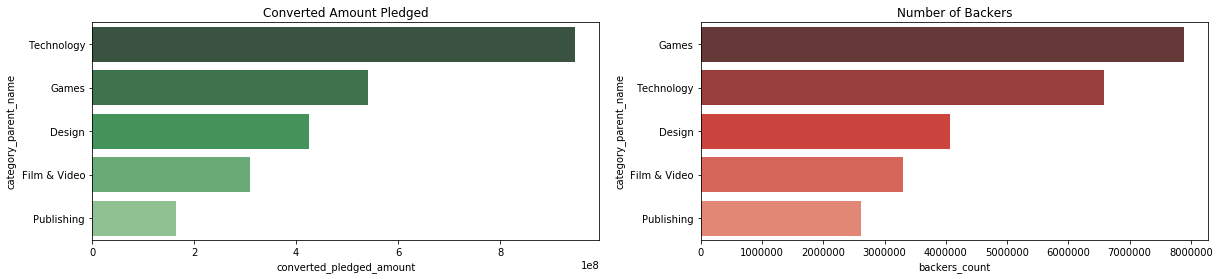

In [211]:
#Grouping the df by main category, sorted by sum of converted_pledged amount.
top_pledged = df.groupby(['category_parent_name']).sum().reset_index().sort_values(by='converted_pledged_amount', ascending=False)
top_backers = df.groupby(['category_parent_name']).sum().reset_index().sort_values(by='backers_count', ascending=False)
#Selecting top five from top_pledged and top_backers
top_five_pledged = top_pledged.head(5)
top_five_backers = top_backers.head(5)
pal_pled = sns.color_palette("Greens_d", len(top_five_pledged))
pal_back = sns.color_palette("Reds_d", len(top_five_backers))
rank_pled = top_five_pledged["converted_pledged_amount"].argsort().argsort()
rank_back = top_five_backers["backers_count"].argsort().argsort()
#Plotting the top five
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
sns.barplot(ax =axes[0], x='converted_pledged_amount',y='category_parent_name', data=top_five_pledged, linewidth=0.7, palette=np.array(pal_pled[::+1])[rank_pled])
axes[0].set_title('Converted Amount Pledged')
sns.barplot(ax=axes[1], x='backers_count',y='category_parent_name', data=top_five_backers, linewidth=0.7, palette=np.array(pal_back[::+1])[rank_back])
axes[1].set_title('Number of Backers');

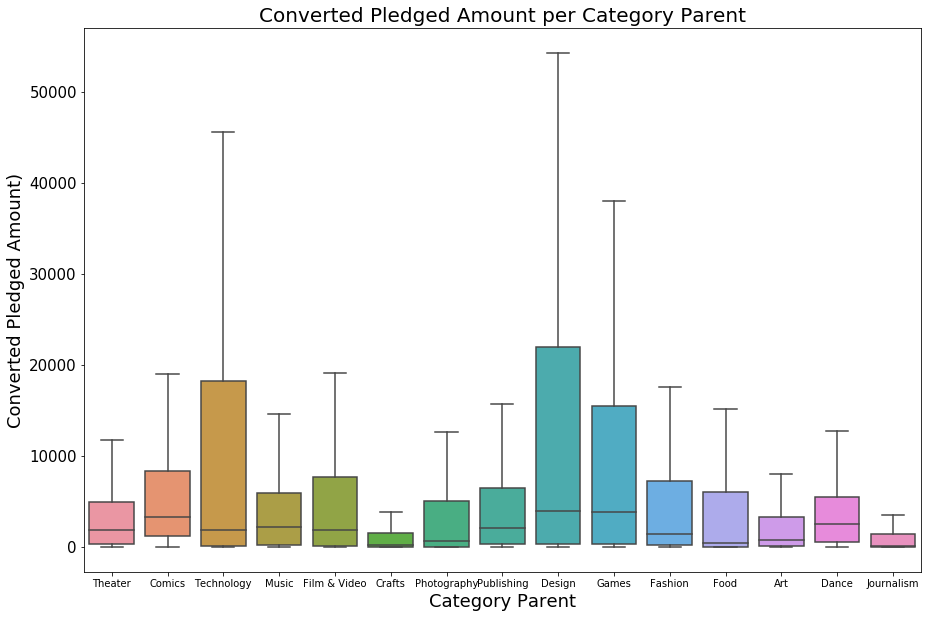

In [222]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='category_parent_name', y='converted_pledged_amount', data=df, orient='v', showfliers=False);
plt.title('Converted Pledged Amount per Category Parent', fontsize=20);
plt.xlabel('Category Parent', fontsize=18)
plt.ylabel('Converted Pledged Amount)', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15);

In [198]:
df.groupby(['category_name']).sum().sort_values(by='converted_pledged_amount', ascending=False)

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,spotlight,state_changed_at,usd_pledged,category_id,category_position,category_parent_id,category_color
category_name,,,,,,,,,,,,,,,,
Product Design,3616368,387213959,6929270127803,6973858278268,4094.200406,1.206599e+08,4747209234534,6960967761594,9.511765e+08,3786,6971879930535,3.832841e+08,123200,22000,30800.0,11339464400
Tabletop Games,3677748,300638045,6289503077501,6324272081865,4196.839333,6.562685e+07,4306217603268,6315527200855,4.078307e+08,3318,6322553801184,2.986454e+08,135014,23826,47652.0,205010817
Hardware,1528940,247761112,3918531817520,3945317688997,2584.394838,1.925109e+08,2807443592831,3937076065228,3.500652e+08,1716,3945061162177,2.477693e+08,138216,21264,42528.0,17348011128
Gadgets,1932307,208275026,4601017258130,4629086588986,2744.817718,3.024205e+08,3211192797371,4619546982310,4.097127e+08,2105,4628679761378,2.081641e+08,1019088,21168,48384.0,19736789184
Video Games,2790198,145313681,4094712964327,4122105967831,2720.610867,3.629745e+08,2911982421783,4114459943015,1.633947e+09,2467,4121297103277,1.450762e+08,94955,18991,32556.0,140064051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bacon,6992,431122,310794901447,312041309643,211.036936,6.293190e+06,250916548049,311407075030,3.942439e+05,41,311984197287,4.308383e+05,66272,218,2180.0,3646174260
Quilts,3673,358109,156168748330,156904117841,106.325822,2.243375e+06,112876223998,156610228799,5.089601e+05,35,156897934908,3.590676e+05,38016,1080,2808.0,1808446608
Farmer's Markets,2482,240456,41193419225,41343786107,24.960024,3.795580e+05,27684714885,41257537338,3.562550e+05,24,41331340985,2.404062e+05,8370,162,270.0,451590390


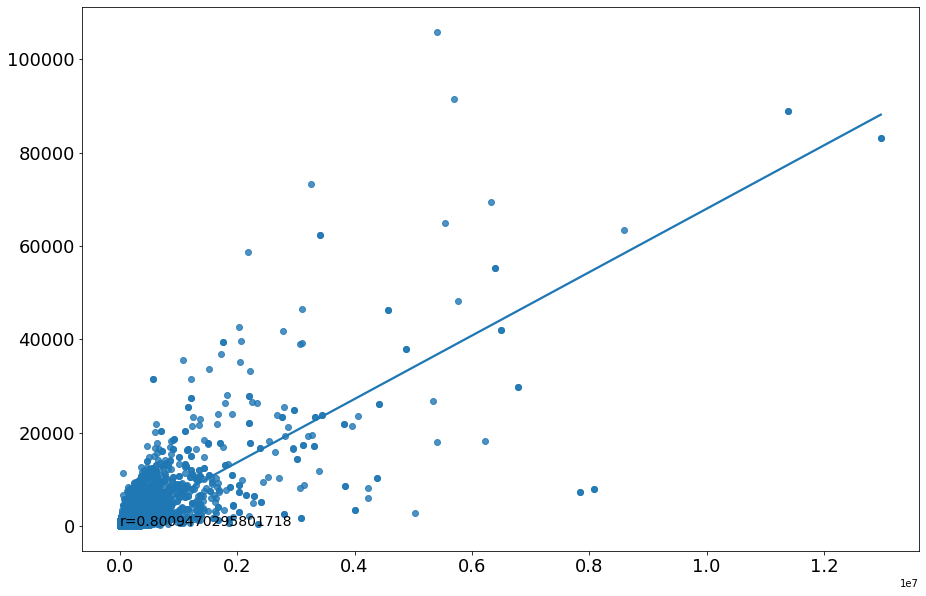

In [226]:
#corr
corr = df['converted_pledged_amount'].corr(df['backers_count'])
#set figure size
plt.figure(figsize=(15, 10))
#plot the data
sns.regplot(data=df,x=df['converted_pledged_amount'],y=df['backers_count'], ci=None)
#format the plot
text = 'r=%s' % (corr)
plt.text(1, 19, text, fontsize=14)
plt.title('', fontsize=20);
plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);